# Image Classification Using Deep Learning

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [46]:
from tensorflow.keras.datasets import cifar10  # Replace with your dataset

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()  # Replace with your dataset loading code


In [47]:
# Explore the distribution of classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # Replace with your class names

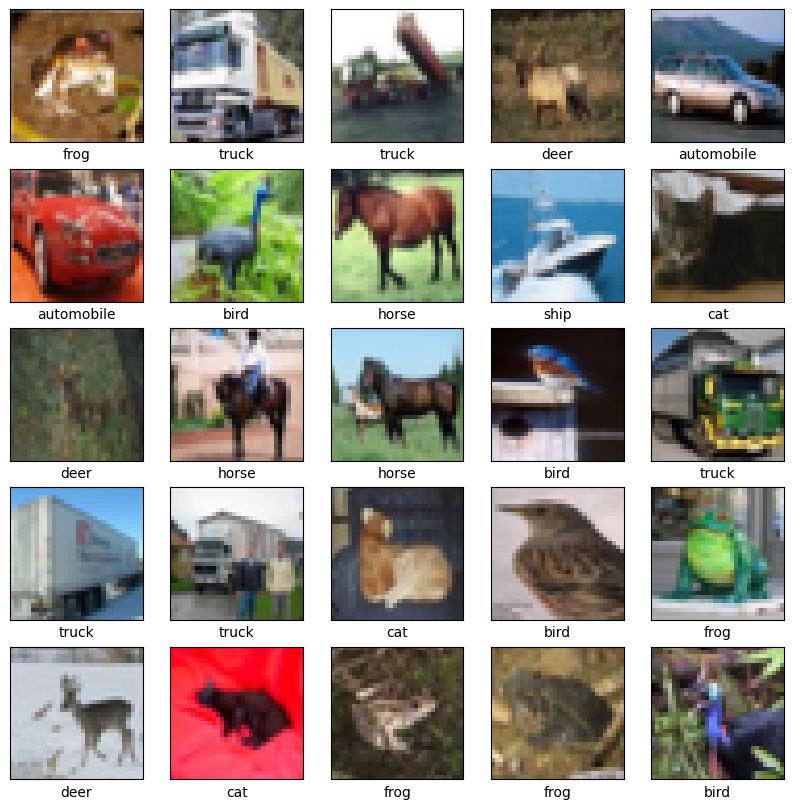

In [48]:
# Display the first few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [49]:
# Data preprocessing
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [50]:
# Split the dataset into training and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [51]:
# Define the Neural Network architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)


Epoch 1/10
1250/1250 [==============================] - 46s 36ms/step - loss: 1.5878 - accuracy: 0.4179 - val_loss: 1.3314 - val_accuracy: 0.5161
Epoch 2/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.2278 - accuracy: 0.5618 - val_loss: 1.1397 - val_accuracy: 0.5985
Epoch 3/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.0507 - accuracy: 0.6292 - val_loss: 1.0191 - val_accuracy: 0.6448
Epoch 4/10
1250/1250 [==============================] - 43s 34ms/step - loss: 0.9348 - accuracy: 0.6708 - val_loss: 0.9532 - val_accuracy: 0.6751
Epoch 5/10
1250/1250 [==============================] - 43s 34ms/step - loss: 0.8624 - accuracy: 0.6950 - val_loss: 0.9492 - val_accuracy: 0.6726
Epoch 6/10
1250/1250 [==============================] - 43s 34ms/step - loss: 0.7914 - accuracy: 0.7242 - val_loss: 0.9138 - val_accuracy: 0.6788
Epoch 7/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.7368 - accuracy: 0.7430 - val_loss: 0.9671 -

In [54]:
# Model evaluation
print(f'Test accuracy: {test_acc}')
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

Test accuracy: 0.7088000178337097
313/313 [==============================] - 3s 11ms/step


In [55]:
# Classification report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_labels, predicted_labels))
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.66      0.83      0.74      1000
           1       0.79      0.86      0.82      1000
           2       0.69      0.52      0.59      1000
           3       0.57      0.42      0.48      1000
           4       0.66      0.67      0.66      1000
           5       0.59      0.65      0.62      1000
           6       0.69      0.86      0.76      1000
           7       0.83      0.70      0.76      1000
           8       0.79      0.83      0.81      1000
           9       0.82      0.76      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

Confusion Matrix:
[[828  23  25   9  10   5   4   5  64  27]
 [ 21 857   2   4   6   2   8   1  39  60]
 [112  10 518  49  94  78  98  17  12  12]
 [ 42  26  42 416  65 212 130  25  25  17]
 [ 28   8  54  51 668  39  84  53   9   6]
 [ 28  1

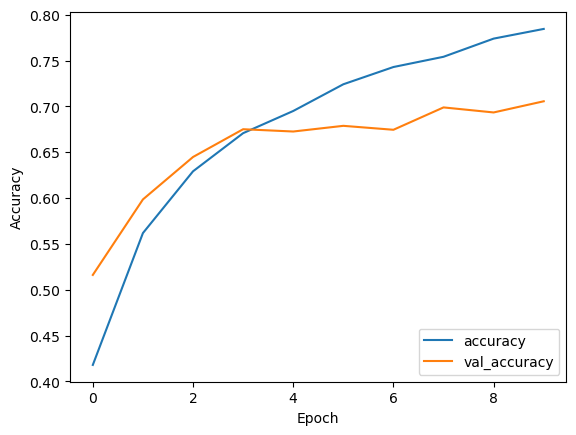

In [56]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Hypertuning model

model.add(layers.Dropout(0.25))  # Adding dropout to reduce overfitting

In [58]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)


Epoch 1/10
1250/1250 [==============================] - 43s 35ms/step - loss: 0.5720 - accuracy: 0.7965 - val_loss: 0.9301 - val_accuracy: 0.7003
Epoch 2/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.5356 - accuracy: 0.8104 - val_loss: 0.9526 - val_accuracy: 0.7040
Epoch 3/10
1250/1250 [==============================] - 45s 36ms/step - loss: 0.5052 - accuracy: 0.8197 - val_loss: 0.9413 - val_accuracy: 0.7080
Epoch 4/10
1250/1250 [==============================] - 46s 37ms/step - loss: 0.4696 - accuracy: 0.8313 - val_loss: 0.9864 - val_accuracy: 0.6998
Epoch 5/10
1250/1250 [==============================] - 50s 40ms/step - loss: 0.4358 - accuracy: 0.8457 - val_loss: 1.0698 - val_accuracy: 0.6812
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.4182 - accuracy: 0.8512 - val_loss: 1.0556 - val_accuracy: 0.7023
Epoch 7/10
1250/1250 [==============================] - 47s 37ms/step - loss: 0.3873 - accuracy: 0.8608 - val_loss: 1.1270 -

In [59]:
# Model evaluation
print(f'Test accuracy: {test_acc}')
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)

Test accuracy: 0.6866999864578247
313/313 [==============================] - 3s 11ms/step


In [60]:
# Save the model for deployment if satisfied with the performance
model.save("image_classification_model.h5")

C:\Users\2001s\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 

# 

# Predicting House Price with Neural Network

In [82]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
# Load the dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_excel('dataset/house_rental_data.xlsx')

In [84]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [85]:
X = data.drop('Price', axis=1)
y = data['Price']

In [86]:
X.head(),y.head()

(       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom
 0  1177.698      2           7        2            2         2
 1  2134.800      5           7        4            2         2
 2  1138.560      5           7        2            2         1
 3  1458.780      2           7        3            2         2
 4   967.776     11          14        3            2         2,
 0    62000
 1    78000
 2    58000
 3    45000
 4    45000
 Name: Price, dtype: int64)

In [87]:
# Handle missing values and outliers (customize based on your dataset)
X.fillna(X.mean(), inplace=True)
# You may want to handle outliers using techniques like winsorizing, Z-score, etc.

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


In [89]:
y_test.shape

(162,)

In [90]:
# Neural Network Architecture
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression, no activation function


In [91]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [92]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 5167759872.0000 - val_loss: 4775900160.0000
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 5117508096.0000 - val_loss: 4720499712.0000
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 5056366080.0000 - val_loss: 4656101888.0000
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 4988566528.0000 - val_loss: 4575681024.0000
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 4896669184.0000 - val_loss: 4467761152.0000
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 4771788288.0000 - val_loss: 4321280512.0000
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 4605161984.0000 - val_loss: 4132891136.0000
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 4390895104.0000 - val_loss: 3897132544.0000
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss:

In [93]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Accuracy Score: {r2}')
print(f'Mean Absolute Error on Test Set: {mae}')
print(f'Mean Squared Error: {mse}')

6/6 [==============================] - 0s 3ms/step
Accuracy Score: 0.6305317568112849
Mean Absolute Error on Test Set: 16432.033516589505
Mean Squared Error: 429694277.38384086


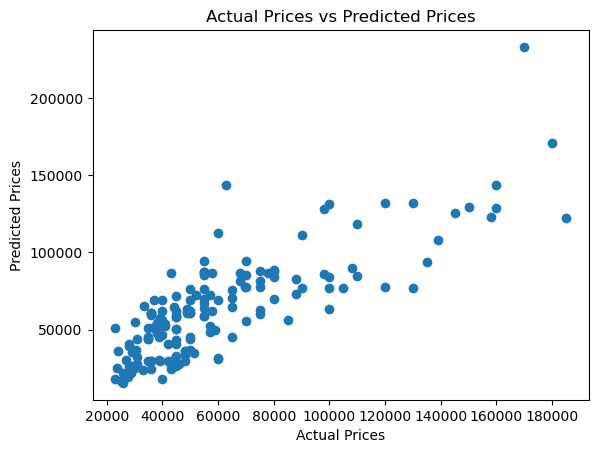

In [94]:
# Visualize predicted house prices against actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()


In [95]:
# Hypertuning the model

model.add(layers.Dropout(0.5))  # Adding dropout for regularization

# Compile the model with adjusted learning rate and early stopping
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from tensorflow.keras.callbacks import EarlyStopping

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Accuracy Score: {r2}')
print(f'Mean Absolute Error on Test Set: {mae}')
print(f'Mean Squared Error: {mse}')

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 4701391360.0000 - val_loss: 404852864.0000
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 4353508352.0000 - val_loss: 431719008.0000
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 3616647168.0000 - val_loss: 476989664.0000
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 3807339008.0000 - val_loss: 537736704.0000
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 3508667904.0000 - val_loss: 614150528.0000
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 3300360192.0000 - val_loss: 700948736.0000
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 2873201152.0000 - val_loss: 772410048.0000
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 2933702144.0000 - val_loss: 839001088.0000
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss

6/6 [==============================] - 0s 3ms/step
Mean Squared Error: 404852858.314363


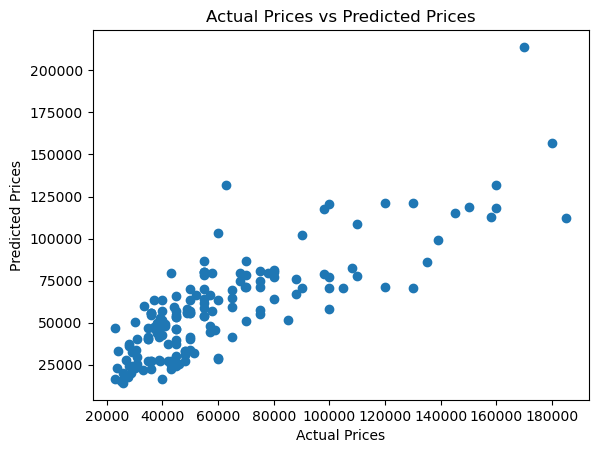

In [96]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predicted house prices against actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [ ]:
# Save the model for deployment if satisfied with the performance
model.save("fine_tuned_house_price_prediction_model.h5")